## Load libraries

In [4]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np
import pandas as pd
import ast                      # convert string to list after importing csv data
import pickle

# Libraries to cluster data
from sklearn.cluster import OPTICS

# Libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import (
    visualize_cluster)  # user-defined functions

# Libraries for evaluation
from sklearn import metrics

# Libraries for monitoring operation process
from datetime import datetime
from tqdm import tqdm

## Configurate and declare global variables

In [5]:
os_name = os.name

if os_name == 'nt':  
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886
%matplotlib inline

## Import data

In [6]:
skill_embeddings = np.load(OUTPUT_DIR + "skill_feat_embeddings.npy")
skill_embeddings.shape

(361584, 600)

In [7]:
skill_docs = pd.read_csv(
    OUTPUT_DIR + "skill_tokens_long_df.csv",
    converters={
        "skill_description_tokens": ast.literal_eval,
        "skill_requirement_tokens": ast.literal_eval,
        "skill_qualification_tokens": ast.literal_eval
    },
    dtype={
        "skill_id": int,
        "job_id": int,
        "job_description": str,
        "job_requirement": str,
        "job_qualification": str
    }
)
skill_docs.shape

(361584, 8)

In [8]:
skill_docs.iloc[:10, ]

,skill_id,job_id,job_description,skill_description_tokens,job_requirement,skill_requirement_tokens,job_qualification,skill_qualification_tokens
0,1,1,ameria investment consulting company,"[ameria, investment, consulting, company]",liquidity reserves assists investment team,"[liquidity, reserves, assists, investment, team]",providing job performance feedback,"[providing, job, performance, feedback]"
1,2,1,provides highly responsible,"[provides, highly, responsible]",incorporation regarding corporate registration,"[incorporation, regarding, corporate, registra...",operate specialized software applications,"[operate, specialized, software, applications]"
2,3,1,complex staff assistance,"[complex, staff, assistance]",including evaluating loss exposure,"[including, evaluating, loss, exposure]",state reporting requirements pertaining,"[state, reporting, requirements, pertaining]"
3,4,1,chief financial officer,"[chief, financial, officer]",internal financial management reports,"[internal, financial, management, reports]",generally accepted accounting principles,"[generally, accepted, accounting, principles]"
4,5,1,investment management,"[investment, management]",investment team leader,"[investment, team, leader]",accounting technical skills coupled,"[accounting, technical, skills, coupled]"
5,6,1,financial management,"[financial, management]",management team participating,"[management, team, participating]",database software applications,"[database, software, applications]"
6,7,1,work performed,"[work, performed]",recommending disciplinary action,"[recommending, disciplinary, action]",supervisory track record,"[supervisory, track, record]"
7,8,1,technical proficiency,"[technical, proficiency]",giving performance evaluations,"[giving, performance, evaluations]",essential duty satisfactorily,"[essential, duty, satisfactorily]"
8,9,1,position manages,"[position, manages]",audited financial statements,"[audited, financial, statements]",critically analyze fiscal,"[critically, analyze, fiscal]"
9,10,1,high level,"[high, level]",annual budgeting process,"[annual, budgeting, process]",compatible personal computer,"[compatible, personal, computer]"


## Clustering data

### OPTICS

In [9]:
def optics_clusterer(X, min_samples, max_eps, xi, min_cluster_size):
    """Generate clusters using OPTICS method

    OPTICS (Ordering Points To Identify the Clustering Structure),
    finds core sample of high density and expands clusters from them.
    Better suited for usage on large datasets.
    Clusters are then extracted using an automatic technique:
    cluster_method = 'xi'

    Args:
        X:                 Matrix of features
                             (n_samples, n_features)
        min_samples:       The number of samples in a neighborhood for a point
                             to be considered as a core point
                             (int > 1 or float between 0 and 1, default=5)
        max_eps:           The maximum distance between two samples for one
                              to be considered as in the neighborhood of the other.
                              (float, default=np.inf)
        xi:                Determines the minimum steepness on the reachability plot
                             that constitutes a cluster boundary
                             (float between 0 and 1, default=0.05)
        min_cluster_size:  Minimum number of samples in an OPTICS cluster
                             (int > 1 or float between 0 and 1)

    Returns:
        Trained clustering model based on X
    """
    clusterer = OPTICS(
        min_samples=min_samples,
        max_eps=max_eps,
        xi=xi,
        min_cluster_size=min_cluster_size,
        n_jobs=-1,
    )
    clusterer.fit(X)
    return clusterer

In [13]:
# Define search space for tuning hyperparameters
X = skill_embeddings
model_list = []
duration_list = []

min_samples_list = [3]
xi_list = [0.05]
min_cluster_size_list = [5]
len(min_samples_list)*len(xi_list)*len(min_cluster_size_list)

1

In [14]:
# Tuning hyperparameter
start_loop_time = datetime.now()
print("Start loop", start_loop_time.strftime("%Y-%m-%d %H:%M:%S.%f"))

tqdm_bar = tqdm(
    desc="Tuning OPTICS Clustering",
    total=len(min_samples_list) * len(xi_list) * len(min_cluster_size_list),
)
for min_samples in min_samples_list:
    for xi in xi_list:
        for min_cluster_size in min_cluster_size_list:
            starttime = datetime.now()
            print("Start", starttime.strftime("%Y-%m-%d %H:%M:%S.%f"))

            clusterer = optics_clusterer(X, min_samples, 0.5, xi, min_cluster_size)

            endtime = datetime.now()
            print("End", endtime.strftime("%Y-%m-%d %H:%M:%S.%f"))
            print("Duration", endtime - starttime)

            model_list.append(clusterer)
            duration_list.append(round((endtime - starttime).seconds / 60, 2))
            tqdm_bar.update(1)

tqdm_bar.close()
end_loop_time = datetime.now()
print("End loop", end_loop_time.strftime("%Y-%m-%d %H:%M:%S.%f"))
print("Duration", end_loop_time - start_loop_time)


Tuning OPTICS Clustering:   0%|                                                                  | 0/1 [00:00<?, ?it/s]

Start loop 2021-05-03 12:35:32.940518
Start 2021-05-03 12:35:32.950489


KeyboardInterrupt: 

## Evaluate cluster performance

In [ ]:
# Calculate evaluation metrics
calhar_scores = []
davbou_scores = []
silho_scores = []
label_list = []

for i in tqdm(range(len(model_list))):
    model = model_list[i]
    cluster_labels = model.labels_
    n = n_range[i]

    # Compute Calinski Harabasz Score
    """
    The score is defined as ratio between the within-cluster dispersion and
    the between-cluster dispersion.
    """
    try:
        ch_score = metrics.calinski_harabasz_score(X, cluster_labels)
#         print("Calinski Harabasz Score =", ch_score)
    except Exception as error:
        ch_score = -2
        print("n =", n)
        print(
            f"Error in calculating Calinski Harabasz Score: {error}"
        )

    # Compute Davies-Bouldin Score
    """
    The score is defined as the average similarity measure of each cluster with
    its most similar cluster, where similarity is the ratio of within-cluster
    distances to between-cluster distances. Thus, clusters which are farther
    apart and less dispersed will result in a better score.
    The minimum score is zero, with lower values indicating better clustering.
    """
    try:
        db_score = metrics.davies_bouldin_score(X, cluster_labels)
#         print("Davies-Bouldin Score =", db_score)
    except Exception as error:
        db_score = -2
        print("n =", n)
        print(f"Error in calculating Davies-Bouldin Score: {error}")

    # Compute Silhouette Score
    """
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indicate that a sample has
    been assigned to the wrong cluster, as a different cluster is more similar.
    """
    try:
        silhouette_score = metrics.silhouette_score(
            X, cluster_labels, random_state=SEED, sample_size=20000, n_jobs=-1
        )
#         print("Silhouette Score =", silhouette_score)
    except Exception as error:
        silhouette_score = -2
        print("n =", n)
        print(f"Error in calculating Silhouette Score: {error}")

    silho_scores.append(silhouette_score)
    calhar_scores.append(ch_score)
    davbou_scores.append(db_score)
    label_list.append(cluster_labels)

In [ ]:
# Combine model sets
tuple_objects = (
    n_range,
    model_list,
    duration_list,
    label_list,
    silho_scores,
    calhar_scores,
    davbou_scores,
)
len(tuple_objects), len(tuple_objects[0])

In [ ]:
# Save tuple
pickle.dump(tuple_objects, open(OUTPUT_DIR + "skills_wald_model_list.pkl", "wb"))

In [ ]:
# # Load pickle
# (
#     n_range,
#     model_list,
#     duration_list,
#     label_list,
#     silho_scores,
#     calhar_scores,
#     davbou_scores,
# ) = pickle.load(open(OUTPUT_DIR + "skills_wald_model_list.pkl", "rb"))

#### Silhoulette score

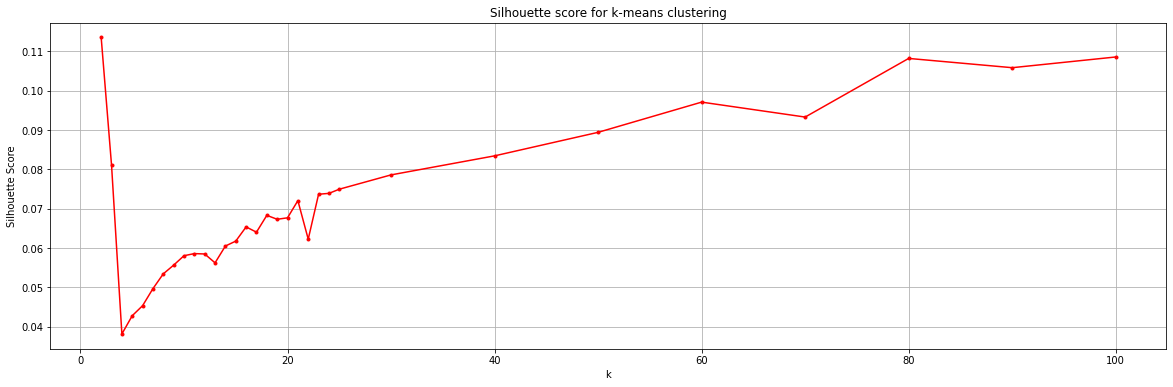

In [77]:
# The higher the better
plt.figure(figsize=(20, 6))
plt.plot(n_range, silho_scores, "r.-")
plt.xlabel("n")
plt.xticks(n_range)
plt.ylabel("Silhouette Score")
plt.title("Silhouette score for k-means clustering")
plt.grid()
plt.show()

#### Calinski Harabasz Score

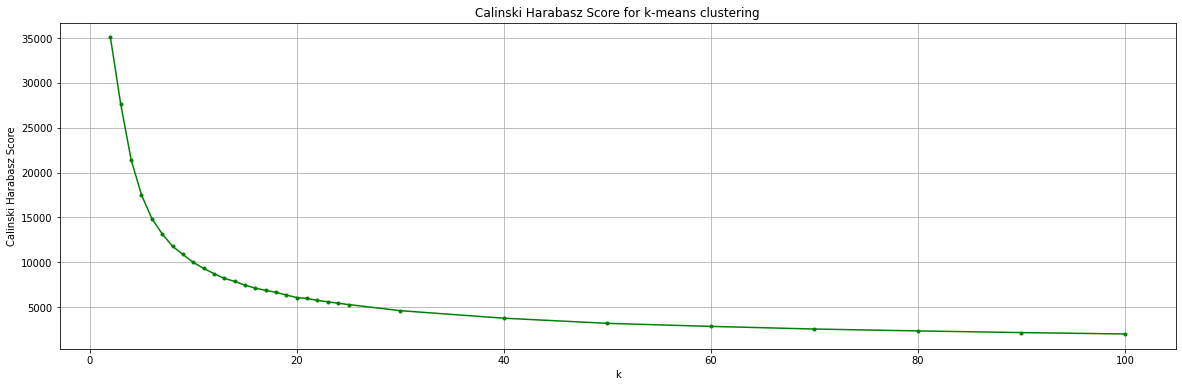

In [78]:
# The higher the better
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot()
plt.plot(n_range, calhar_scores, "g.-")
plt.xlabel("n")
plt.xticks(n_range)
plt.ylabel("Calinski Harabasz Score")
plt.title("Calinski Harabasz Score for k-means clustering")
plt.grid()
plt.show()

#### Davies-Bouldin Score

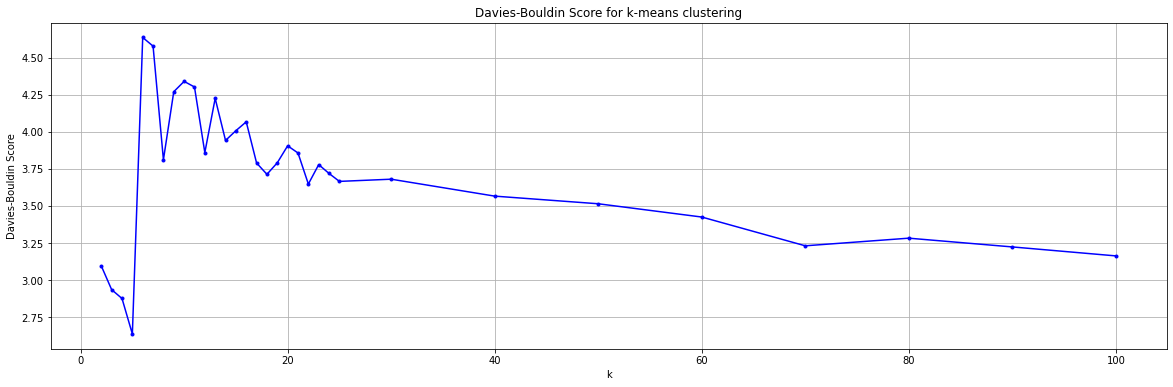

In [79]:
# Closer to 0 is better
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot()
plt.plot(n_range, davbou_scores, "b.-")
plt.xlabel("n")
plt.xticks(n_range)
plt.ylabel("Davies-Bouldin Score")
plt.title("Davies-Bouldin Score for k-means clustering")
plt.grid()
plt.show()

## Save cluster results to file

In [80]:
# Select the optimal number of clusters
best_index = np.argmax(silho_scores)
# best_index = int(np.where(np.asarray(n_range) == 100)[0])
print(best_index)

best_n = n_range[best_index]
print(f'Optimal n = {best_n}')

best_labels = label_list[best_index]

31
Optimal k = 100


In [81]:
# Create text and token columns
skill_docs["feature_skills_tokens"] = (
    skill_docs["skill_description_tokens"] + skill_docs["skill_requirement_tokens"]
)

skill_docs["feature_skills"] = (
    skill_docs["job_description"] + skill_docs["job_requirement"]
)

In [ ]:
df_clusters = skill_docs[["skill_id", "job_id", "feature_skills", "feature_skills_tokens"]]
df_clusters["model_type"] = "kmeans"
df_clusters["number_clusters"] = best_n
df_clusters["skill_cluster"] = best_labels

In [83]:
df_clusters

,skill_id,job_id,feature_skills,feature_skills_tokens,model_type,number_clusters,skill_cluster
0,1,1,ameria investment consulting companyliquidity ...,"[ameria, investment, consulting, company, liqu...",kmeans,100,79
1,2,1,provides highly responsibleincorporation regar...,"[provides, highly, responsible, incorporation,...",kmeans,100,54
2,3,1,complex staff assistanceincluding evaluating l...,"[complex, staff, assistance, including, evalua...",kmeans,100,68
3,4,1,chief financial officerinternal financial mana...,"[chief, financial, officer, internal, financia...",kmeans,100,5
4,5,1,investment managementinvestment team leader,"[investment, management, investment, team, lea...",kmeans,100,64
...,...,...,...,...,...,...,...
361579,16,18993,NaN,"[unprovided, unprovided]",kmeans,100,7
361580,17,18993,NaN,"[unprovided, unprovided]",kmeans,100,7
361581,18,18993,NaN,"[unprovided, unprovided]",kmeans,100,7
361582,19,18993,NaN,"[unprovided, unprovided]",kmeans,100,7


In [84]:
df_clusters.to_csv(OUTPUT_DIR + "job-skill-clusters_wide_wald.csv", index=False)

## Visualize clusters

In [5]:
pca_datapoint = np.load(OUTPUT_DIR + "skills_wide_pca_datapoints.npy")
tsne_datapoint = np.load(OUTPUT_DIR + "skills_wide_tsne_datapoints.npy")

In [7]:
# best_model_df = pd.read_csv(
#     OUTPUT_DIR + "job-skill-clusters_wide_wald.csv",
#     usecols=["skill_cluster", "number_clusters"],
# )

In [19]:
# best_n = int(best_model_df.loc[0, ['number_clusters']])
# best_labels = best_model_df['skill_cluster'].values
# best_n, len(best_labels)

(100, 361584)

Start PCA 2021-05-03 10:04:35.054189
End PCA 2021-05-03 10:04:35.121186
PCA duration 0:00:00.066997

Start t-SNE 2021-05-03 10:04:35.121186
End t-SNE 2021-05-03 10:04:35.170154
t-SNE duration 0:00:00.048968



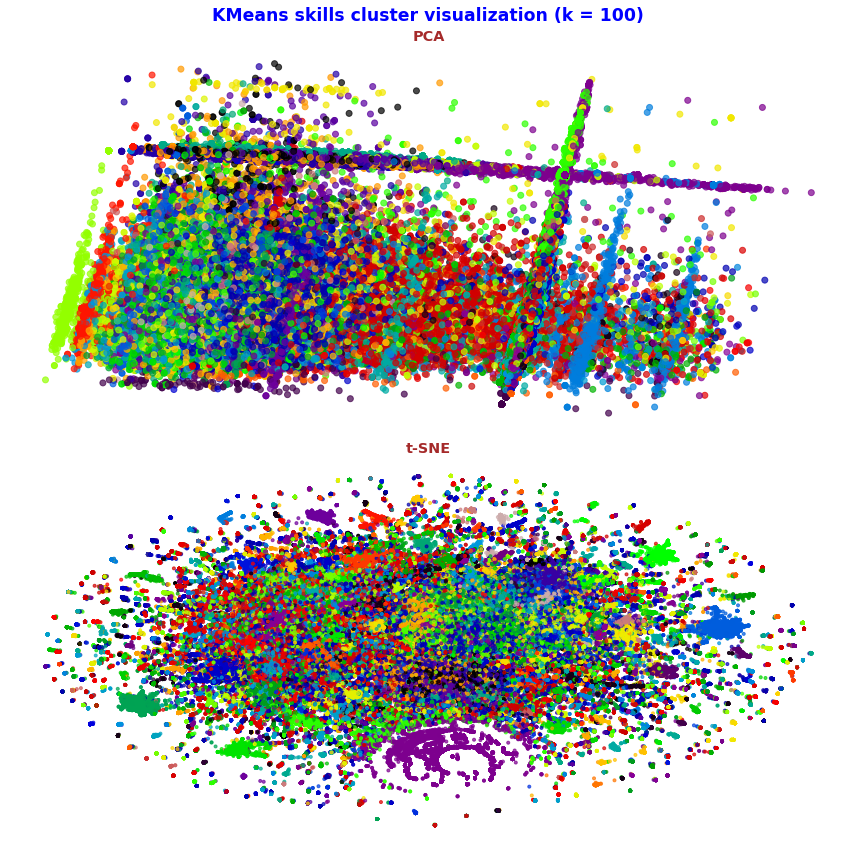

In [20]:
plot_skill = f"Wald skills cluster visualization (n = {best_n})"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(best_labels.astype(float) / best_n)

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_skill,
    (12, 12),
    colors,
    palette,
    pca_datapoint,
    tsne_datapoint,
    None,
    pca=True,
    tsne=True,
    mds=False
)